In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
import geopy.distance
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 팀원들과 Feature를 분담하여 EDA 실시
- 내가 맡은 Features: ride, takeoff, distance, bus_route_id

## 1. ride와 takeoff

In [3]:
ride = train.iloc[:, 8:14]
ride['18~20_ride'] = train['18~20_ride']
ride.head()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,18~20_ride
0,0.0,1.0,2.0,5.0,2.0,6.0,0.0
1,1.0,4.0,4.0,2.0,5.0,6.0,5.0
2,1.0,1.0,0.0,2.0,0.0,0.0,2.0
3,0.0,17.0,6.0,26.0,14.0,16.0,53.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
ride.corr()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,18~20_ride
6~7_ride,1.000000,0.375844,0.296554,0.313622,0.279269,0.265106,0.262173
7~8_ride,0.375844,1.000000,0.479535,0.427030,0.395135,0.389945,0.371751
8~9_ride,0.296554,0.479535,1.000000,0.506296,0.458034,0.453017,0.445316
9~10_ride,0.313622,0.427030,0.506296,1.000000,0.537374,0.517800,0.494085
10~11_ride,0.279269,0.395135,0.458034,0.537374,1.000000,0.542494,0.512666
11~12_ride,0.265106,0.389945,0.453017,0.517800,0.542494,1.000000,0.569747
18~20_ride,0.262173,0.371751,0.445316,0.494085,0.512666,0.569747,1.000000


#### heatmap을 통한 시각화

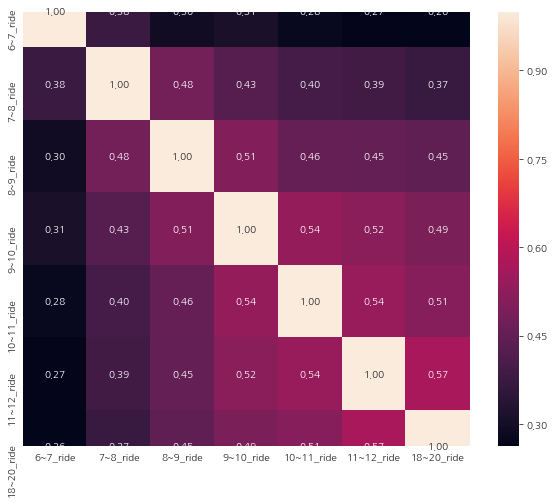

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data=ride.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 `11~12 > 10~11 > 9~10 > 8~9 > 7~8 > 6~7_ride` 순으로 `18~20_ride`에 크게 영향을 미치며, 긍정적인 상관관계에 있음을 알 수 있다.  
  - 8시 이후 ride는 강한 양의 상관관계, 그 이전은 약한 양의 상관관계를 보임

In [15]:
takeoff = train.iloc[:,14:21]
takeoff.head()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
takeoff.corr()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
6~7_takeoff,1.000000,0.233302,0.189507,0.212331,0.184720,0.194141,0.178353
7~8_takeoff,0.233302,1.000000,0.429626,0.338220,0.326165,0.334719,0.219430
8~9_takeoff,0.189507,0.429626,1.000000,0.443466,0.429163,0.425298,0.274360
9~10_takeoff,0.212331,0.338220,0.443466,1.000000,0.539305,0.531232,0.295875
10~11_takeoff,0.184720,0.326165,0.429163,0.539305,1.000000,0.540594,0.290691
11~12_takeoff,0.194141,0.334719,0.425298,0.531232,0.540594,1.000000,0.313540
18~20_ride,0.178353,0.219430,0.274360,0.295875,0.290691,0.313540,1.000000


#### heatmap을 통한 시각화

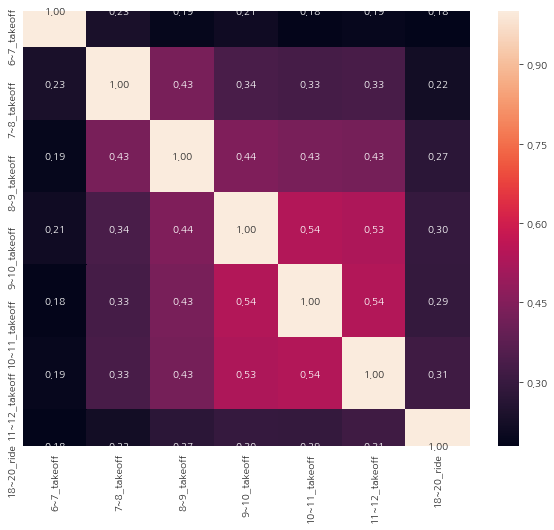

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data=takeoff.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 `11~12 > 9~10 > 10~11 > 8~9 > 7~8 > 6~7_takeoff` 순으로 `18~20_ride`와 긍정적 상관관계를 이루고 있음을 알 수 있다.    
  - 하지만 대체로 약한 상관관계를 가짐

### 1.1 시간대별 승하차인원을 각각의 총합으로 바꿔주자

In [10]:
ride['am_ride'] = train['6~7_ride']+train['7~8_ride']+train['8~9_ride']+train['9~10_ride']+train['10~11_ride']+train['11~12_ride']

del ride['6~7_ride']
del ride['7~8_ride']
del ride['8~9_ride']
del ride['9~10_ride']
del ride['10~11_ride']
del ride['11~12_ride']

ride.corr()

,18~20_ride,am_ride
18~20_ride,1.000000,0.621556
am_ride,0.621556,1.000000


- correlation이 훨씬 개선되었음을 확인할 수 있다.

In [16]:
takeoff['am_takeoff'] = train['6~7_takeoff']+train['7~8_takeoff']+train['8~9_takeoff']+train['9~10_takeoff']+train['10~11_takeoff']+train['11~12_takeoff']

del takeoff['6~7_takeoff']
del takeoff['7~8_takeoff']
del takeoff['8~9_takeoff']
del takeoff['9~10_takeoff']
del takeoff['10~11_takeoff']
del takeoff['11~12_takeoff']

takeoff.corr()

,18~20_ride,am_takeoff
18~20_ride,1.000000,0.383496
am_takeoff,0.383496,1.000000


- 여전히 약한 상관관계이긴 하지만 전보다는 개선되었음을 확인할 수 있다.

## 2. dis_jeju, dis_seoguipo, dis_gosan, dis_seongsan, location_name

In [17]:
jeju = (33.51411, 126.52969)
gosan = (33.29382, 126.16283)
seongsan = (33.38677, 126.880)
seoguipo = (33.24616, 126.5653)

In [18]:
data2 = train[['station_code','latitude', 'longitude']].drop_duplicates(keep='first')
data2.head()

,station_code,latitude,longitude
0,344,33.48990,126.49373
1,357,33.48944,126.48508
2,432,33.48181,126.47352
3,1579,33.50577,126.49252
4,1646,33.25579,126.41260


In [19]:
t1 = [geopy.distance.vincenty((i,j), jeju).km for i,j in list(zip(data2['latitude'],data2['longitude']))]
t2 = [geopy.distance.vincenty((i,j), gosan).km for i,j in list(zip(data2['latitude'],data2['longitude']))]
t3 = [geopy.distance.vincenty((i,j), seongsan).km for i,j in list(zip(data2['latitude'],data2['longitude']))]
t4 = [geopy.distance.vincenty((i,j), seoguipo).km for i,j in list(zip(data2['latitude'],data2['longitude']))]

data2['dis_jeju']=t1
data2['dis_gosan']=t2
data2['dis_seongsan']=t3
data2['dis_seoguipo']=t4

In [20]:
total=pd.DataFrame(list(zip( t1,t2,t3,t4)),columns=['dis_jeju','dis_gosan','dis_seongsan','dis_seoguipo'])
total['location_name'] = total.apply(lambda x: x.argmin(), axis=1)
total['location_name'] = total['location_name'].apply(lambda x: x[4:])

total.head()

,dis_jeju,dis_gosan,dis_seongsan,dis_seoguipo,location_name
0,4.286659,37.692766,37.695909,27.841879,jeju
1,4.966848,37.008492,38.448058,27.996179,jeju
2,6.330746,35.642126,39.241905,27.496551,jeju
3,3.575272,38.643401,38.369340,29.579404,jeju
4,30.652098,23.648361,45.881475,14.269792,seoguipo


In [21]:
data2 = pd.merge(data2, total, on=['dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_seoguipo'])
data2.shape

(3563, 8)

In [22]:
train = pd.merge(train, data2, how='left', on=['station_code', 'latitude', 'longitude'])
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dis_jeju,dis_gosan,dis_seongsan,dis_seoguipo,location_name
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.286659,37.692766,37.695909,27.841879,jeju
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,0.0,5.0,4.966848,37.008492,38.448058,27.996179,jeju
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,6.330746,35.642126,39.241905,27.496551,jeju
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,0.0,53.0,3.575272,38.643401,38.369340,29.579404,jeju
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,30.652098,23.648361,45.881475,14.269792,seoguipo


In [23]:
train.shape

(415423, 26)

In [28]:
distance = train.iloc[:, 21:25]
distance['18~20_ride'] = train['18~20_ride']
distance.head()

,dis_jeju,dis_gosan,dis_seongsan,dis_seoguipo,18~20_ride
0,4.286659,37.692766,37.695909,27.841879,0.0
1,4.966848,37.008492,38.448058,27.996179,5.0
2,6.330746,35.642126,39.241905,27.496551,2.0
3,3.575272,38.643401,38.369340,29.579404,53.0
4,30.652098,23.648361,45.881475,14.269792,0.0


In [29]:
distance.corr()

,dis_jeju,dis_gosan,dis_seongsan,dis_seoguipo,18~20_ride
dis_jeju,1.000000,-0.116716,-0.016138,-0.391736,-0.120976
dis_gosan,-0.116716,1.000000,-0.940731,0.207658,-0.001577
dis_seongsan,-0.016138,-0.940731,1.000000,0.019574,0.015980
dis_seoguipo,-0.391736,0.207658,0.019574,1.000000,0.026983
18~20_ride,-0.120976,-0.001577,0.015980,0.026983,1.000000


#### heatmap을 통한 시각화

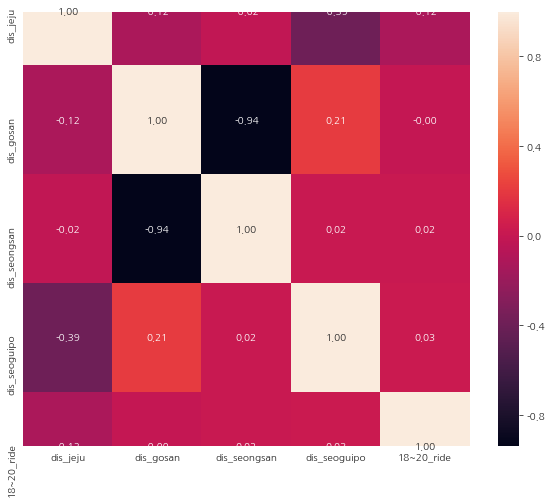

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data=distance.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 제주시와의 거리가 멀면 멀수록 승차인원이 줄어드는 경향을 보이나 서귀포시, 고산, 성산과의 거리는 모호한 상관성을 띄고 있다는 것을 알 수 있다.

### jeju, seoguipo, gosan, seongsan 지역을 나눠서 살펴보자

In [34]:
jeju = train.loc[train['location_name'] == 'jeju']
jeju = jeju[['dis_jeju', 'dis_seoguipo', 'dis_gosan', 'dis_seongsan', '18~20_ride']]
jeju.corr()

,dis_jeju,dis_seoguipo,dis_gosan,dis_seongsan,18~20_ride
dis_jeju,1.000000,0.424983,-0.043609,0.250794,-0.090694
dis_seoguipo,0.424983,1.000000,0.392574,0.169234,-0.041675
dis_gosan,-0.043609,0.392574,1.000000,-0.818283,-0.010924
dis_seongsan,0.250794,0.169234,-0.818283,1.000000,-0.000900
18~20_ride,-0.090694,-0.041675,-0.010924,-0.000900,1.000000


#### heatmap을 통한 시각화

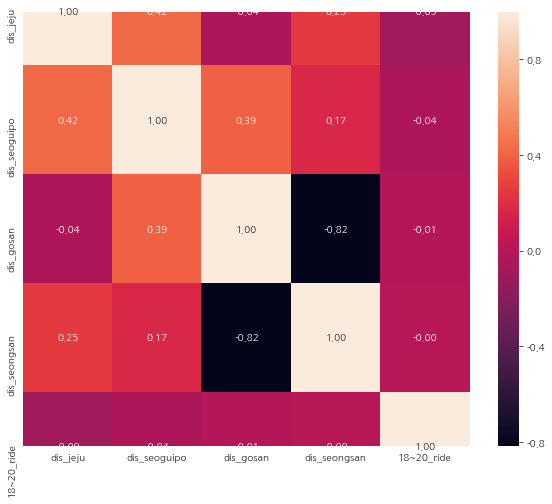

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(data=jeju.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 제주의 경우 제주와 서귀포에서 멀수록 `18~20_ride`가 감소하는 경향이 있지만 고산과 성산까지의 거리는 `18~20_ride`와 모호한 상관관계에 있음을 알 수 있다.

In [36]:
seoguipo = train.loc[train['location_name'] == 'seoguipo']
seoguipo = seoguipo[['dis_jeju', 'dis_seoguipo', 'dis_gosan', 'dis_seongsan', '18~20_ride']]
seoguipo.corr()

,dis_jeju,dis_seoguipo,dis_gosan,dis_seongsan,18~20_ride
dis_jeju,1.000000,0.352355,-0.228187,0.283644,0.001751
dis_seoguipo,0.352355,1.000000,-0.122226,0.089648,-0.069834
dis_gosan,-0.228187,-0.122226,1.000000,-0.996344,-0.042729
dis_seongsan,0.283644,0.089648,-0.996344,1.000000,0.046119
18~20_ride,0.001751,-0.069834,-0.042729,0.046119,1.000000


#### heatmap을 통한 시각화

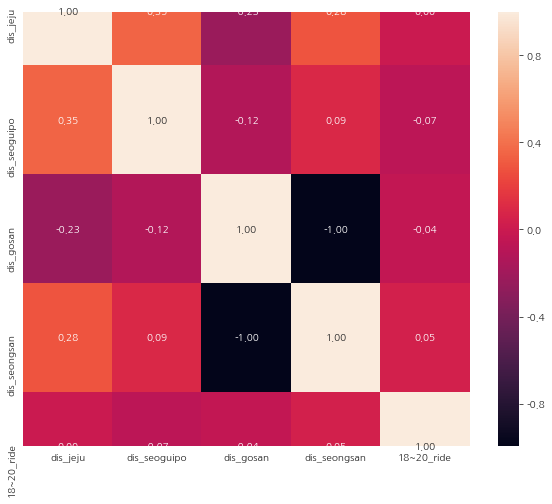

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(data=seoguipo.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 서귀포의 경우 `18~20_ride`는 서귀포와 고산까지의 거리가 멀수록 감소하고 성산까지의 거리가 멀수록 증가하는 경향이 있지만 제주까지의 거리와는 모호한 상관관계를 띄고있음을 알 수 있다.

In [38]:
gosan = train.loc[train['location_name'] == 'gosan']
gosan = gosan[['dis_jeju', 'dis_seoguipo', 'dis_gosan', 'dis_seongsan', '18~20_ride']]
gosan.corr()

,dis_jeju,dis_seoguipo,dis_gosan,dis_seongsan,18~20_ride
dis_jeju,1.000000,-0.032525,-0.718858,0.637027,-0.056695
dis_seoguipo,-0.032525,1.000000,-0.446306,0.746837,-0.016009
dis_gosan,-0.718858,-0.446306,1.000000,-0.850209,0.054459
dis_seongsan,0.637027,0.746837,-0.850209,1.000000,-0.048821
18~20_ride,-0.056695,-0.016009,0.054459,-0.048821,1.000000


#### heatmap을 통한 시각화

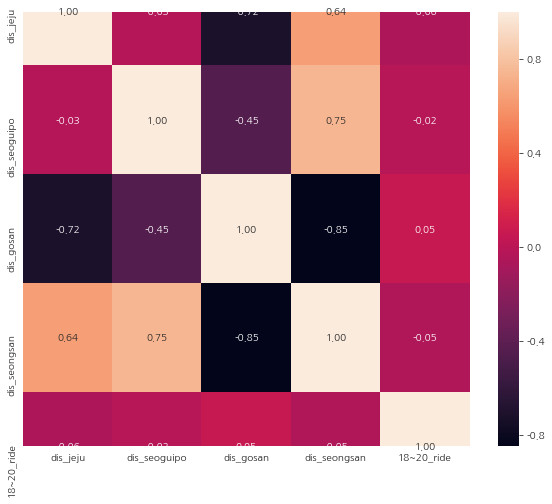

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(data=gosan.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 고산의 경우 `18~20_ride`가 제주, 성산까지의 거리가 멀수록 감소하고 고산까지의 거리가 멀수록 증가하는 경향이 있지만 서귀포까지의 거리와는 모호한 상관관계에 있음을 알 수 있다.

In [40]:
seongsan = train.loc[train['location_name'] == 'seongsan']
seongsan = gosan[['dis_jeju', 'dis_seoguipo', 'dis_gosan', 'dis_seongsan', '18~20_ride']]
seongsan.corr()

,dis_jeju,dis_seoguipo,dis_gosan,dis_seongsan,18~20_ride
dis_jeju,1.000000,-0.032525,-0.718858,0.637027,-0.056695
dis_seoguipo,-0.032525,1.000000,-0.446306,0.746837,-0.016009
dis_gosan,-0.718858,-0.446306,1.000000,-0.850209,0.054459
dis_seongsan,0.637027,0.746837,-0.850209,1.000000,-0.048821
18~20_ride,-0.056695,-0.016009,0.054459,-0.048821,1.000000


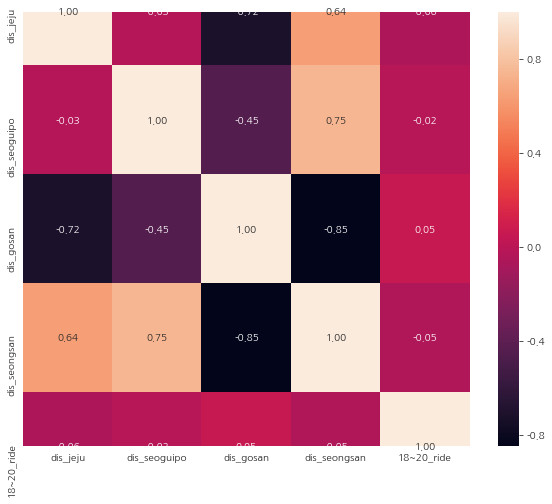

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(data=seongsan.corr(), annot=True, fmt='.2f')
plt.show()

- corr()과 heatmap을 통해 성산의 경우 `18~20_ride`가 제주, 성산까지의 거리가 멀수록 감소하고 고산까지의 거리가 멀수록 증가하는 경향이 있지만 서귀포까지의 거리와는 모호한 상관관계에 있음을 알 수 있다.

## 3. bus_route_id, bus_route_type

In [42]:
train['bus_route_str'] = train['bus_route_id'].apply(str)
train['bus_route_type'] = [train['bus_route_str'].iloc[i][0] for i in range(len(train))]
del train['bus_route_str']
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,dis_jeju,dis_gosan,dis_seongsan,dis_seoguipo,location_name,bus_route_type
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,0.0,0.0,0.0,0.0,4.286659,37.692766,37.695909,27.841879,jeju,4
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,0.0,0.0,0.0,5.0,4.966848,37.008492,38.448058,27.996179,jeju,4
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,2.0,6.330746,35.642126,39.241905,27.496551,jeju,4
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,0.0,0.0,0.0,53.0,3.575272,38.643401,38.369340,29.579404,jeju,4
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1.0,0.0,0.0,0.0,30.652098,23.648361,45.881475,14.269792,seoguipo,4


In [46]:
train['bus_route_type'].value_counts()

2    307531
3    105296
4      1704
8       738
7       130
1        24
Name: bus_route_type, dtype: int64

In [49]:
bus = train.groupby(['bus_route_type'])[['18~20_ride']].sum()
bus = bus.reset_index()
bus

,bus_route_type,18~20_ride
0,1,4.0
1,2,450148.0
2,3,59169.0
3,4,4361.0
4,7,0.0
5,8,2313.0


<function matplotlib.pyplot.show(*args, **kw)>

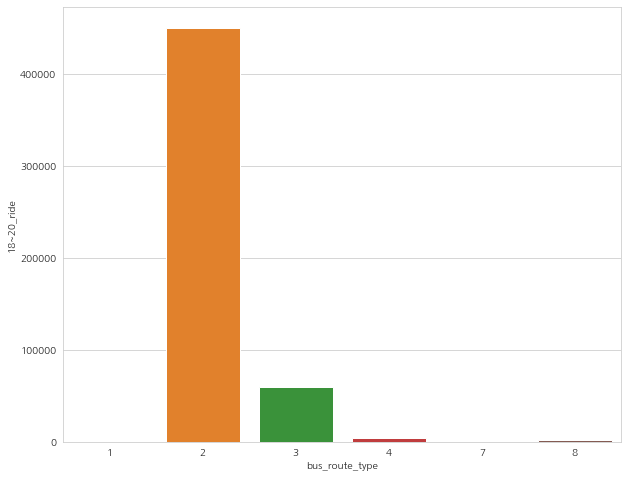

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(data= bus, x= "bus_route_type", y= "18~20_ride")
plt.show

- bus_route_id는 padding된 숫자로 보이는데 제주도 버스 노선 정보를 검색해본 결과 100번대가 급행, 200번대가 일반간선, 300번대가 제주간선, 400번대가 제주지선, 700번대가 북동+남동+남서+북서 지선, 800번대가 관광지 순환버스라고 한다.  
- 이처럼 제주 버스 노선은 앞자리로 분류된다는 것에 착안하여 bus_route_id의 첫 자리를 새 feature인 bus_route_type으로 추가해 주었다.  
- 위 결과를 통해 일반간선 > 제주간선 > 제주지선 > 관광지 순환 > 급행 > 북동+남동+남서+북서 지선버스 순으로 `18~20_ride` 승객 수가 많다는 것을 알 수 있다.  
- [제주 버스 노선 정보 출처](https://www.wooleelife.com/88)